In [81]:
%config IPCompleter.greedy=True

import scipy as sp
data = sp.genfromtxt("data/web_traffic.tsv", delimiter="\t")

print(data[:10])
print(data.shape)

[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00              nan]
 [  3.00000000e+00   1.38600000e+03]
 [  4.00000000e+00   1.36500000e+03]
 [  5.00000000e+00   1.48800000e+03]
 [  6.00000000e+00   1.33700000e+03]
 [  7.00000000e+00   1.88300000e+03]
 [  8.00000000e+00   2.28300000e+03]
 [  9.00000000e+00   1.33500000e+03]
 [  1.00000000e+01   1.02500000e+03]]
(743L, 2L)


In [8]:
x = data[:,0]
y = data[:,1]

sp.sum(sp.isnan(y))

8

In [9]:
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

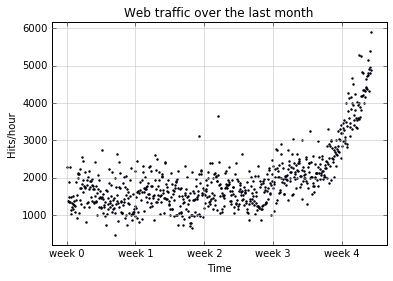

In [29]:
def visit_plot():  
    # plot the (x,y) points with dots of size 2
    plt.scatter(x,y, s=2)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks([w*7*24 for w in range(10)],
               ['week %i' % w for w in range(10)])
    plt.autoscale(tight=True)

    plt.grid(True, linestyle='-', color='0.75')
    
visit_plot()

In [17]:
# squared distance of the mode;'s prediction to the real data
def error(f, x, y):
    return sp.sum((f(x)-y)**2)

# Starting with a simple straight line

The polyfit() function returns the paraameters of the fitted model function, fp1

full=True -> additional info

In [21]:
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)

print("Model parameters: %s" % fp1)
print("Error of aproximation: %s" % residuals)

Model parameters: [   2.59619213  989.02487106]
Error of aproximation: [  3.17389767e+08]


This means the best straight line fit is the following function is:
f(x) = 2.59619213 * x + 989.02487106

We use poly1d() to create model function from the model parameters

In [22]:
f1 = sp.poly1d(fp1)
print(error(f1, x, y))

317389767.34


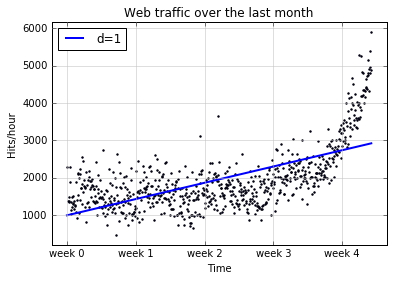

In [30]:
visit_plot()

fx = sp.linspace(0,x[-1], 1000)
plt.plot(fx, f1(fx), linewidth=2)
plt.legend(["d=%i" % f1.order], loc="upper left")

# Polynomial of degree 2

In [34]:
f2p = sp.polyfit(x, y, 2)
print(f2p)
f2 = sp.poly1d(f2p)
print(error(f2, x, y))

[  1.05322215e-02  -5.26545650e+00   1.97476082e+03]
179983507.878


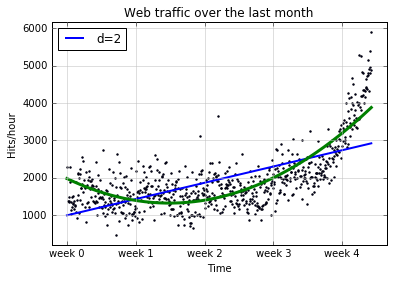

In [35]:
visit_plot()

fx = sp.linspace(0,x[-1], 1000)
plt.plot(fx, f1(fx), linewidth=2)
plt.legend(["d=%i" % f1.order], loc="upper left")

fx2 = sp.linspace(0,x[-1], 1000)
plt.plot(fx2, f2(fx2), linewidth=3)
plt.legend(["d=%i" % f2.order], loc="upper left")


# Overfitting

if we are capturing not only the underlying process but also the noise.

In [37]:
f100p = sp.polyfit(x, y, 100)
print(f2p)
f100 = sp.poly1d(f100p)
print(error(f100, x, y))

[  1.05322215e-02  -5.26545650e+00   1.97476082e+03]
109452397.749


C:\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


polyfit cannot determine a good fit with 100 degrees (numerical errors)
53 is good enough

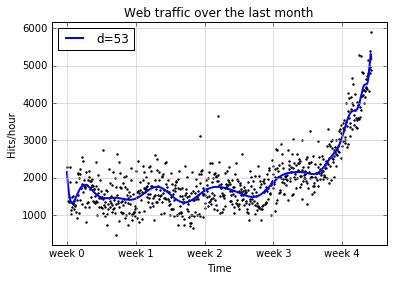

In [41]:
visit_plot()

fx = sp.linspace(0,x[-1], 1000)
plt.plot(fx, f100(fx), linewidth=2)
plt.legend(["d=%i" % f100.order], loc="upper left")

following choices:
* choosing one of the fitted polnyomial models
* switching to another more complex model class
* thinking differently about the data and start again

# Stepping back to go forward
lets take another look at data

In [42]:
inflection = 3.5 * 7 * 24
xa = x[:inflection] # data before the inflection point
ya = y[:inflection]

xb = x[inflection:] # data after
yb = y[inflection:]

fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))

fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)

print("Error inflection=%f" % (fa_error + fb_error))

Error inflection=132950348.197616


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


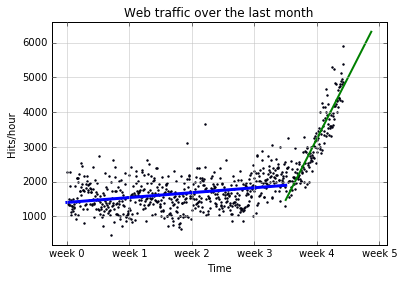

In [59]:
visit_plot()

fx = sp.linspace(0,inflection,1000)
plt.plot(fx, fa(fx), linewidth=3)
fx = sp.linspace(inflection,x[-1] + 75,1000)
plt.plot(fx, fb(fx), linewidth=2)


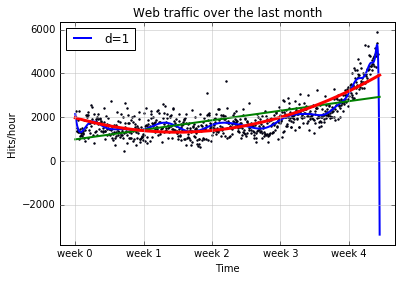

In [71]:
visit_plot()

fx = sp.linspace(0,x[-1]+5, 1000)
plt.plot(fx, f100(fx), linewidth=2)
plt.legend(["d=%i" % f100.order], loc="upper left")


plt.plot(fx, f1(fx), linewidth=2)
plt.legend(["d=%i" % f1.order], loc="upper left")

plt.plot(fx, f2(fx), linewidth=3)


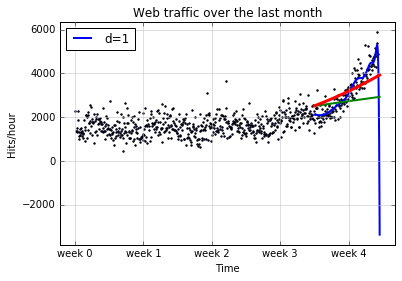

In [75]:
visit_plot()

fx = sp.linspace(inflection,x[-1]+5, 1000)

plt.plot(fx, f100(fx), linewidth=2)
plt.legend(["d=%i" % f100.order], loc="upper left")


plt.plot(fx, f1(fx), linewidth=2)
plt.legend(["d=%i" % f1.order], loc="upper left")

plt.plot(fx, f2(fx), linewidth=3)


# Predictions


In [80]:
fbt2 = sp.poly1d(sp.polyfit(xb, yb, 2))

from scipy.optimize import fsolve
reached_max = fsolve(fbt2-100000, x0 =800)/(7*24)

print("100,000 hits/hours expected at week %f" % reached_max[0])

100,000 hits/hours expected at week 9.837964


# Training
it's essential to select part of our data for testing and other for training. Then compare those results